# Tasks for laboratory assignment 2

In [14]:
# imports section

import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from autocorrect import Speller
from wordcloud import WordCloud

import gensim as gs
from gensim.test.utils import lee_corpus_list
from gensim.models import Word2Vec
import gensim.downloader as api

import matplotlib.pyplot as plt

import json
import re

# Download the necessary resources
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kingl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kingl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Extract data from the json file 

Write a script, that would extract all the the data from the json file and return it in a list of texts for further use in the next tasks

In [32]:
def extract_texts_from_file(file_path):
    """
    Extract the text data from the json file

    Args:
        file_path (str): Relative location of the json file in the project.

    Returns:
        list: The list of texts as strings.
    """
    # function reads and extracts the "texts" array from the JSON file and returns it
    with open(file_path, 'r') as file:
        data = json.load(file)["texts"]
    
    return data

texts = extract_texts_from_file('resources/data.json')
print(texts)

['Oppenheimer, directed by Christopher Nolan, delves into the life of J. Robert Oppenheimer, the theoretical physicist who led the development of the atomic bomb. The film explores his moral and emotional struggles.', "Oppenheimer captures the life of the 'father of the atomic bomb' and his internal conflict after the success of the Manhattan Project. The film's complex narrative reflects on the cost of scientific achievement.", 'In Oppenheimer, Cillian Murphy delivers a riveting performance as the conflicted physicist who grapples with the consequences of his groundbreaking work on the atomic bomb, under the weight of global politics and ethics.', 'Oppenheimer is a cinematic exploration of ambition, guilt, and responsibility. Through stunning visuals and a thought-provoking story, Nolan brings the life of the brilliant but haunted physicist to the big screen.', 'Ducks are versatile waterfowl, known for their adaptability in freshwater and coastal habitats. With webbed feet and waterpr

## Process the texts

Write a script, that would process these texts. Processing should include:

- Lowercasing
- Removing Punctuation
- Removing Special Characters and Numbers
- Stemming or Lemmatization
- Handling Abbreviations
- Spelling Correction

In [36]:
shortening_dict = {
    "Christopher Nolan": "Nolan",
    "J. Robert Oppenheimer": "Oppenheimer",
    "theoretical physicist": "physicist",
    "atomic bomb": "A-bomb",
    "Manhattan Project": "M. Project",
    "explores his": "examines",
    "computer science": "CS"
}

def process_texts(texts):
    """
    Process the texts

    Args:
        texts (list): list of str texts to be processed.

    Returns:
        list: The list of processed texts as lists of strings (words).
    """
    def shorten_text(text, dictionary):
        for phrase, short_form in dictionary.items():
            text = re.sub(r'\b' + re.escape(phrase) + r'\b', short_form, text)
        return text

    def process_text(text):
        text = shorten_text(text, shortening_dict)  # applied shortening logic for handling abbreviations
        text = text.lower()   # lowercase the text
        text = text.translate(str.maketrans('', '', string.punctuation))   # removed punctuation
        text = re.sub(r'\d+', '', text)  # removed numbers
        text = re.sub(r'[^a-z\s]', '', text)  # removed special characters and numbers

        words = word_tokenize(text)  # tokenized of text
        lemmatizer = WordNetLemmatizer()
        
        # applied lemmatization to the tokenized words
        lemmatized_words = [lemmatizer.lemmatize(word) for word in words]  

        return lemmatized_words  # returned a list of words

    return [process_text(text) for text in texts]  # processed each text from the array

texts_processed = process_texts(texts)
print(texts_processed)


[['oppenheimer', 'directed', 'by', 'nolan', 'delf', 'into', 'the', 'life', 'of', 'oppenheimer', 'the', 'physicist', 'who', 'led', 'the', 'development', 'of', 'the', 'abomb', 'the', 'film', 'examines', 'moral', 'and', 'emotional', 'struggle'], ['oppenheimer', 'capture', 'the', 'life', 'of', 'the', 'father', 'of', 'the', 'abomb', 'and', 'his', 'internal', 'conflict', 'after', 'the', 'success', 'of', 'the', 'm', 'project', 'the', 'film', 'complex', 'narrative', 'reflects', 'on', 'the', 'cost', 'of', 'scientific', 'achievement'], ['in', 'oppenheimer', 'cillian', 'murphy', 'delivers', 'a', 'riveting', 'performance', 'a', 'the', 'conflicted', 'physicist', 'who', 'grapple', 'with', 'the', 'consequence', 'of', 'his', 'groundbreaking', 'work', 'on', 'the', 'abomb', 'under', 'the', 'weight', 'of', 'global', 'politics', 'and', 'ethic'], ['oppenheimer', 'is', 'a', 'cinematic', 'exploration', 'of', 'ambition', 'guilt', 'and', 'responsibility', 'through', 'stunning', 'visuals', 'and', 'a', 'thoughtp

## Visualize as cloud of words

Visualize the texts as a cloud of words.

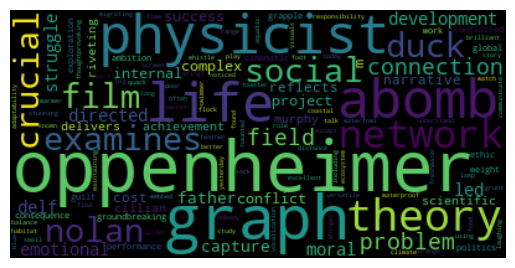

In [38]:
def visualize_texts(texts_processed):
    """
    Visualize the texts as cloud of words

    Args:
        texts_processed (list): list of texts, processed in previous task.

    Returns:
        None: None.
    """
    text_together = " ".join([word for sentence in texts_processed for word in sentence])
    wc = WordCloud().generate(text_together)
    
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
    return None

visualize_texts(texts_processed)

## Calculate cosine similarities using TFIDF

Calculate the TFIDF score and cosine similarity between the texts. You may use gensim, write your own script using numpy or use other module. Output the result as a matrix $n\times n$ of cosine similarity scores (where $n$ is the length of texts list).

**Extra credit**: use word2vec word embeddings in vector spaces to get better TFIDF scores by representing each word as a vector.

In [ ]:
def calcuate_tfidf(texts_processed):
    """
    Calculate TFIDF score between the texts in the list.

    Args:
        credit: 'common' or 'extra'
        texts_processed (list): list of texts, processed in previous task.

    Returns:
        cosine_matrix (list): a matrix of cosine similarity scores.
    """

    # calculate the term frequency-inverse document frequency scores for a list of processed texts and compute the cosine similarity matrix. used this https://uk.wikipedia.org/wiki/TF-IDF
    
    words = [word for sentence in texts_processed for word in sentence]    
    vocabulary = sorted(set(words))
    vocabulary_dict = {k:i for i,k in enumerate(vocabulary)}
    text_len = len(texts_processed)
    vocabulary_len = len(vocabulary)
    
    tf = np.zeros((text_len, vocabulary_len), dtype=int)

    for i, doc in enumerate(texts_processed):
        for word in doc:
            tf[i, vocabulary_dict[word]] +=1
    
    idf = np.log(tf.shape[0]/tf.astype(bool).sum(axis=0))
    
    tfidf = tf * idf
    
    tfidf_norm = tfidf / np.linalg.norm(tfidf, axis = 1)[:,None]
    cosine_similarity = tfidf_norm @ tfidf_norm.T

    return cosine_similarity

cosine_matrix = calcuate_tfidf(texts_processed)
print(cosine_matrix)

[[1.00000000e+00 1.23790394e-01 1.04522794e-01 1.06152720e-01
  0.00000000e+00 1.11085774e-03 1.28229523e-02 6.32986254e-04
  6.49973148e-04 4.20602908e-02]
 [1.23790394e-01 1.00000000e+00 1.05331368e-01 5.03030541e-02
  0.00000000e+00 1.33952937e-03 2.17547943e-02 7.63287366e-04
  7.83771036e-04 2.12603540e-02]
 [1.04522794e-01 1.05331368e-01 1.00000000e+00 5.67665673e-02
  2.55500614e-02 8.73568654e-03 3.42618173e-02 2.89590883e-03
  1.48726392e-02 1.27900037e-02]
 [1.06152720e-01 5.03030541e-02 5.67665673e-02 1.00000000e+00
  1.32794501e-02 7.48543310e-02 2.97408150e-02 2.54376148e-02
  2.43298515e-02 1.04388799e-02]
 [0.00000000e+00 0.00000000e+00 2.55500614e-02 1.32794501e-02
  1.00000000e+00 2.26396983e-02 5.26416095e-02 2.15186001e-03
  3.09126094e-02 2.15101045e-03]
 [1.11085774e-03 1.33952937e-03 8.73568654e-03 7.48543310e-02
  2.26396983e-02 1.00000000e+00 2.56327438e-02 2.23724011e-02
  1.05552482e-02 2.23635684e-02]
 [1.28229523e-02 2.17547943e-02 3.42618173e-02 2.97408150e

## Visualize data

Visualize the `cosine_matrix` data using matplotlib. Choose your own method of plotting the scores in a way, that the similarity indeces between texts would be instantly visible. Plot data about texts as well (a couple of first words in the document).

*Hint: remember heat maps, aren't they nice for this task?*

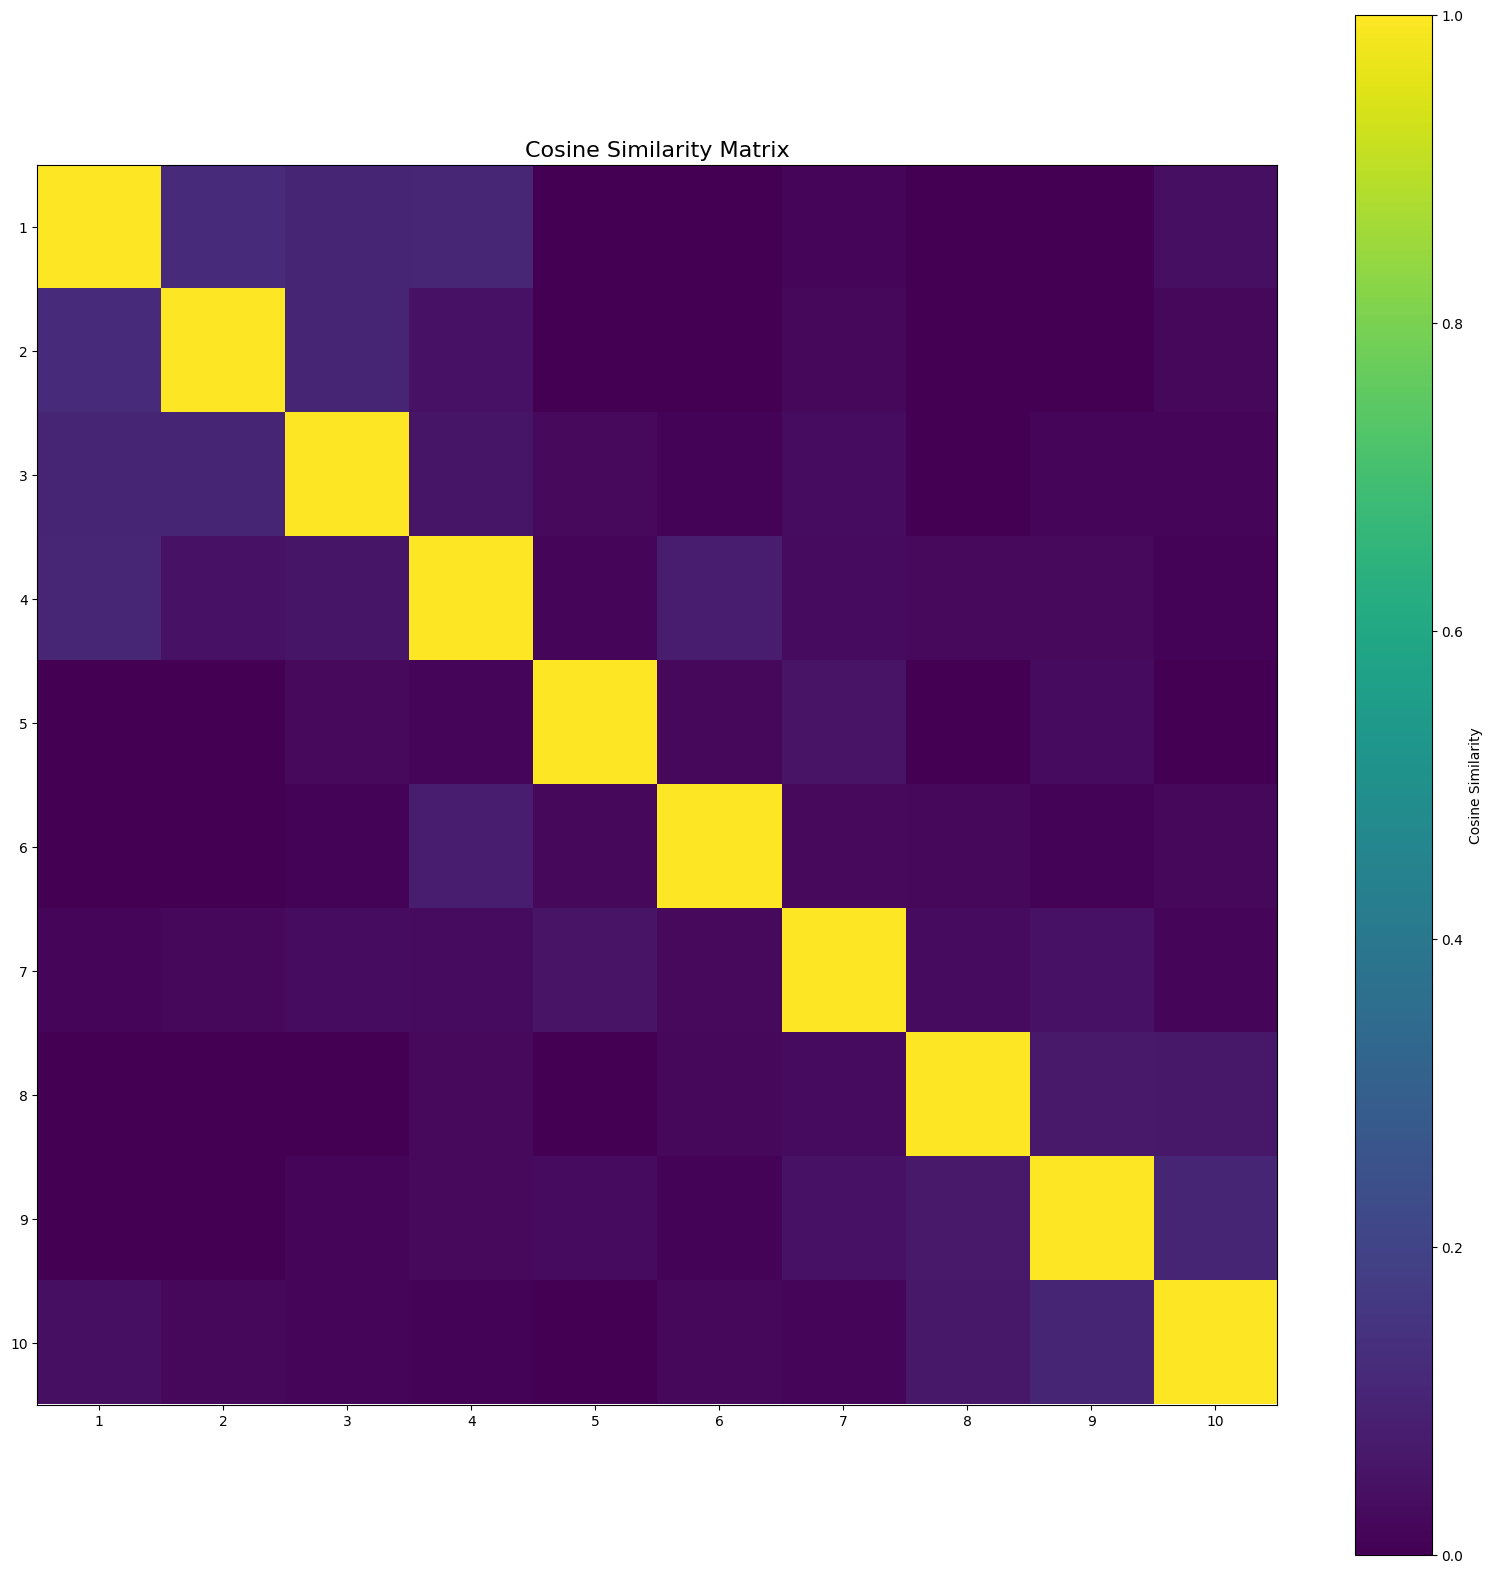

In [55]:
def visualize_data(cosine_sim_matrix, processed_documents):
    """
    Visualize the cosine similarity matrix from the previous task. 

    Args:
        cosine_sim_matrix (np.ndarray): matrix of cosine similarity scores (values from 0.0 to 1.0 expected).
        processed_documents (list): list of texts processed in the previous task.

    Returns:
        None: None.
    """
    plt.figure(figsize=(20, 20))
    heatmap = plt.imshow(cosine_sim_matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar(heatmap, label='Cosine Similarity')
    plt.xticks(ticks=np.arange(cosine_sim_matrix.shape[1]), labels=np.arange(1, cosine_sim_matrix.shape[1] + 1))
    plt.yticks(ticks=np.arange(cosine_sim_matrix.shape[0]), labels=np.arange(1, cosine_sim_matrix.shape[0] + 1))
    plt.title('Cosine Similarity Matrix', fontsize=16)
    
    return None

visualize_data(cosine_matrix, texts_processed)


## Analyse your own text using TFIDF (or any other method)

Analyse your own text using previous methods. You may use API fetching to get text data, download texts from Kaggle or use any texts you want. Find cosine similarities and visualize them.

['Lions are social big cats known for their majestic manes and powerful roars. Living in prides, they are skilled hunters and play a vital role in maintaining the balance of their ecosystems.', 'Dolphins are highly intelligent marine mammals recognized for their playful behavior and strong social bonds. They communicate using a complex system of clicks and whistles, showcasing their advanced cognitive abilities.', 'Elephants are the largest land animals, distinguished by their massive ears and long trunks. These gentle giants are known for their strong family ties and remarkable memory, making them a symbol of wisdom in many cultures.', 'Penguins are flightless birds that thrive in cold climates, known for their distinctive tuxedo-like appearance. They are excellent swimmers, using their flippers to navigate through icy waters in search of fish.', "Giraffes are the tallest terrestrial animals, famous for their long necks and unique coat patterns. They feed primarily on leaves from tall

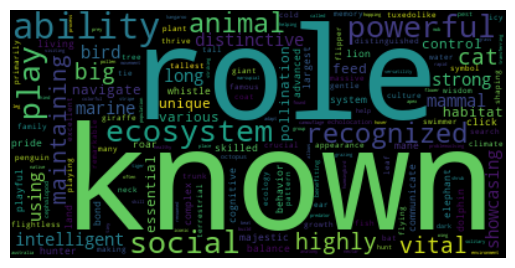

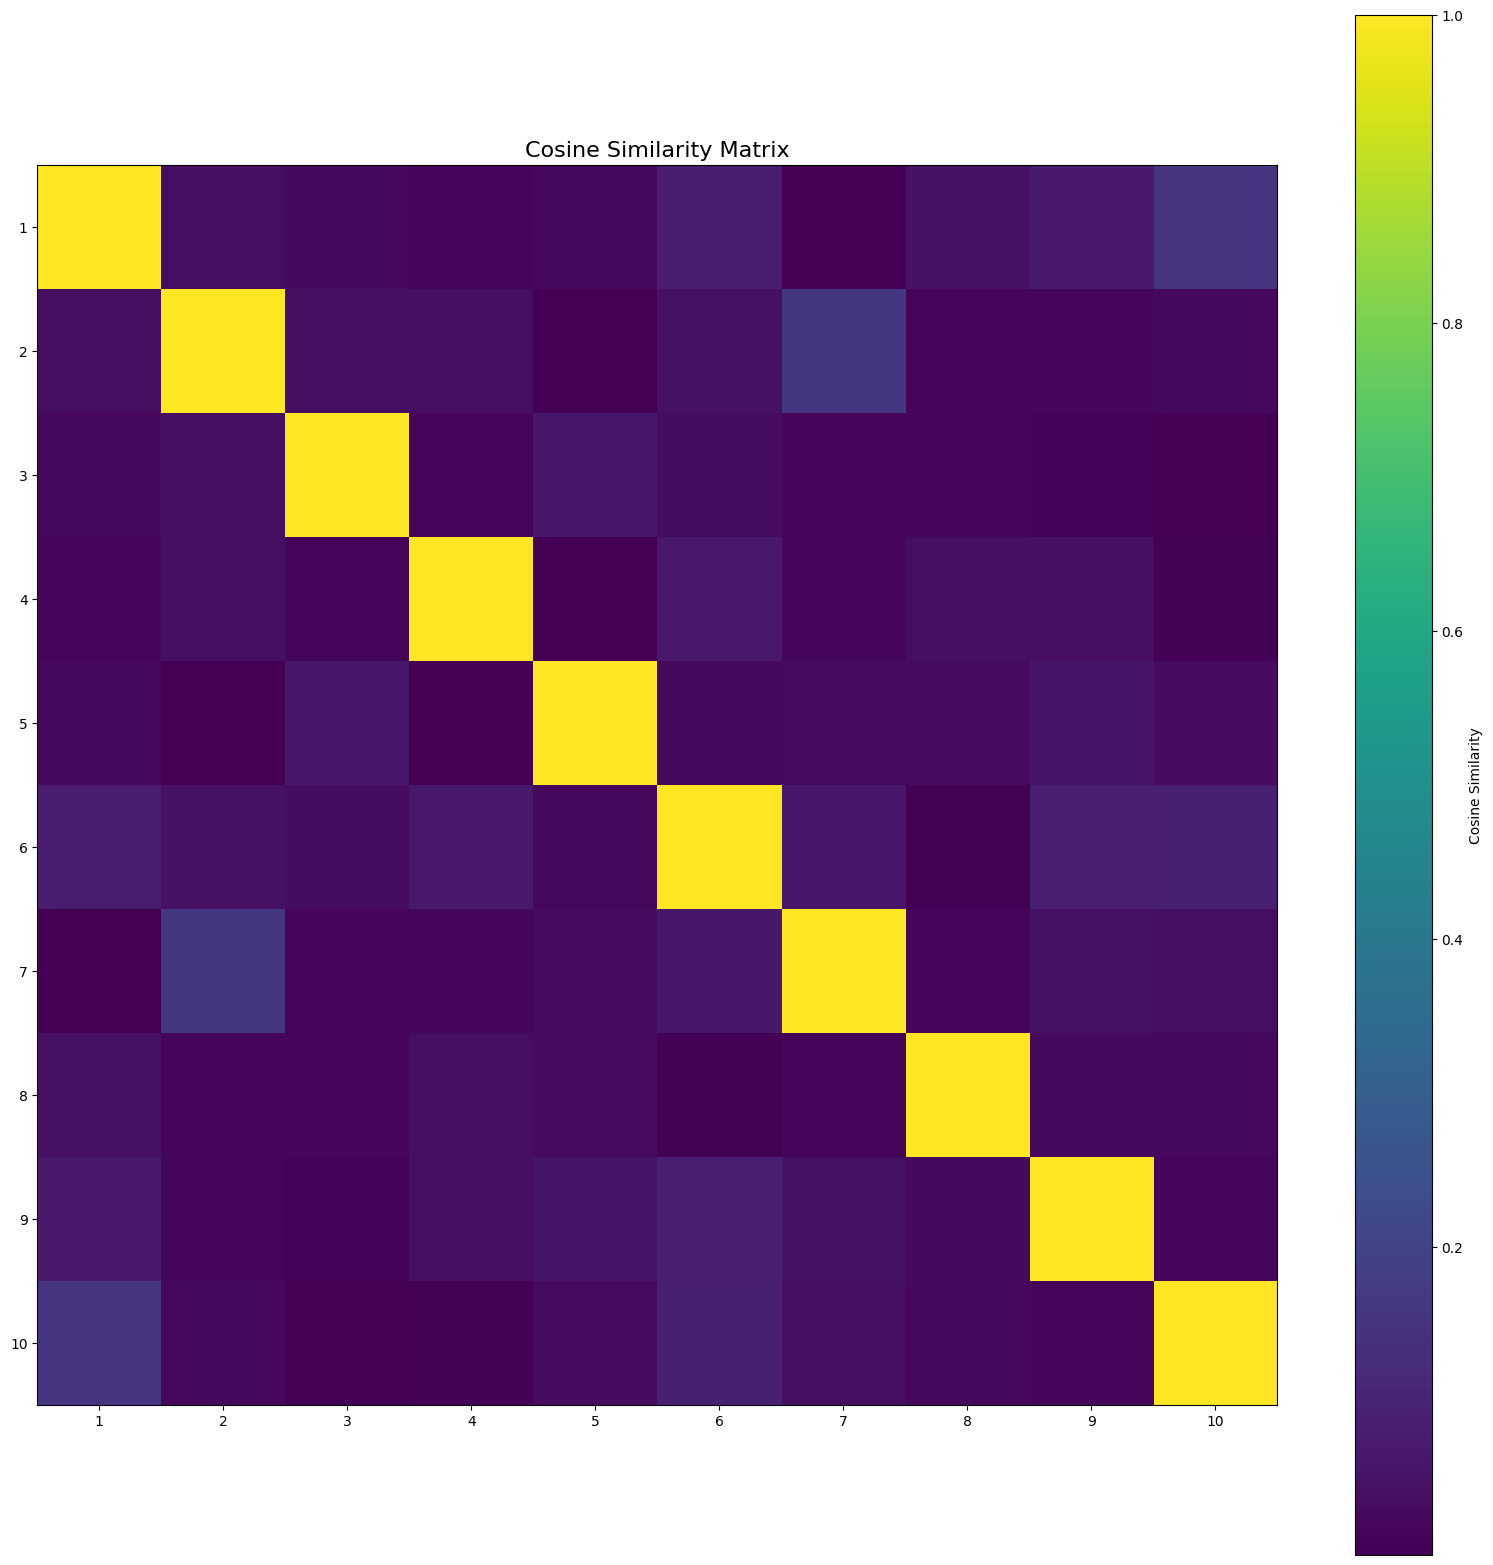

In [65]:
def analyze_own_data():
    """
    Get the texts you want to analyse. Either API fetching, Kaggle or any other source.

    Args:
        None: None.

    Returns:
        list: list of texts.
    """
    texts = extract_texts_from_file('resources/my_data.json')
    print(texts)
    texts_processed = process_texts(texts)
    visualize_texts(texts_processed)
    cosine_matrix = calcuate_tfidf(texts_processed)
    visualize_data(cosine_matrix, texts_processed)

    return None

analyze_own_data()